Spatial Data Science

Final Project

Mariam Hovhannisyan

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pickle
import geopandas as gpd, pandas as pd
import contextily as ctx
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

In [2]:
from pyproj import CRS
crs = CRS.from_epsg(4326)

yerevan_gdf = gpd.read_file('Yerevan grid shapefile/yerevan.shp')
yerevan_gdf.head()

,FID,geometry
0,0,"POLYGON ((44.41298 40.18969, 44.41155 40.19399..."
1,1,"POLYGON ((44.41772 40.18316, 44.41418 40.18603..."
2,2,"POLYGON ((44.42035 40.18107, 44.42025 40.18110..."
3,3,"POLYGON ((44.42598 40.17664, 44.42576 40.17920..."
4,4,"POLYGON ((44.42652 40.17009, 44.42598 40.17664..."


In [3]:
yerevan_gdf.set_crs(epsg=4326, inplace=True)
print(yerevan_gdf.crs)

epsg:4326


In [12]:
polylist = [p for p in yerevan_gdf.geometry]


# plot city
# west, south, east, north = yerevan_gdf.unary_union.bounds

# fig, ax = plt.subplots(figsize=(30,30))
# for polygon, n in zip(yerevan_gdf.geometry, np.arange(len(polylist))):
#     p = polygon.representative_point().coords[:][0]
#     patch = PolygonPatch(polygon, fc='#ffffff', ec='#000000', alpha=0.5, zorder=2)
#     ax.add_patch(patch)
#     plt.annotate(text=n, xy=p, horizontalalignment='center', size=14)
    
# ax.set_xlim(west, east)
# ax.set_ylim(south, north)
# ax.axis('off')
# plt.show()

In [4]:
pkl_file = open("Yerevan_grid_population.pkl", "rb")
yerevan_pop = pickle.load(pkl_file)
pkl_file.close()
print(yerevan_pop)

[    0.             0.             0.             0.
     0.             0.             0.             0.
   727.53728629     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.          3839.78012206
     0.             0.             0.             0.
     0.             0.             0.             0.
  2020.93690635     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.          1050.8871913
     0.             0.             0.             0.
     0.             0.         

In [6]:
print('yerevan geodataframe length: ', len(yerevan_gdf))
print('Yerevan population array length: ', len(yerevan_pop))
yerevan_gdf['population'] = yerevan_pop
#yerevan_gdf.head()

yerevan geodataframe length:  549
Yerevan population array length:  549


In [7]:
#not where people are throughout the day but where they actually 'live' every hour
np.set_printoptions(suppress=True, precision=3)

# load population densities
pkl_file = open('Yerevan_population.pkl', 'rb')
pop = pickle.load(pkl_file)
pkl_file.close()
print(pop.shape) #84 is the weekly data with 2-hour interval
print(pop)

(84, 549)
[[  0.      0.      0.    ... 717.269   0.      0.   ]
 [  0.      0.      0.    ... 791.557   0.      0.   ]
 [  0.      0.      0.    ... 834.591   0.      0.   ]
 ...
 [  0.      0.      0.    ... 872.206   0.      0.   ]
 [  0.      0.      0.    ... 760.611   0.      0.   ]
 [  0.      0.      0.    ... 539.288   0.      0.   ]]


In [8]:
# import GG data
data = pd.read_csv('Yerevan_gps_data.csv', header=0, index_col=0)
print(len(data))
data.tail()

18155834


,createdAt,partnerId,lat,lon,status
18155829,2019-03-31 21:14:05,279826,40.181720,44.521299,0
18155830,2019-03-31 21:14:21,279826,40.180492,44.522924,0
18155831,2019-03-31 21:14:37,279826,40.180423,44.522933,0
18155832,2019-03-31 21:14:53,279826,40.180408,44.522929,0
18155833,2019-03-31 21:15:01,279826,40.180407,44.522929,0


In [10]:
geometry = [Point(xy) for xy in zip(data.lon, data.lat)] 
crs = CRS.from_epsg(4326)
gdf = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)
gdf.head()

,createdAt,partnerId,lat,lon,status,geometry
0,2019-03-31 15:11:10,2,40.177266,44.445987,0,POINT (44.44599 40.17727)
1,2019-03-15 16:29:56,12,40.199932,44.496100,0,POINT (44.49610 40.19993)
2,2019-03-15 16:30:27,12,40.199932,44.496100,0,POINT (44.49610 40.19993)
3,2019-03-18 20:17:29,12,40.175073,44.572091,0,POINT (44.57209 40.17507)
4,2019-03-18 20:17:45,12,40.175047,44.572103,0,POINT (44.57210 40.17505)


In [13]:
polyframe = gpd.GeoDataFrame(geometry=polylist)
polyframe.crs = yerevan_gdf.geometry.crs
polyframe.tail()

,geometry
544,"POLYGON ((44.57644 40.20351, 44.58512 40.20354..."
545,"POLYGON ((44.57648 40.19696, 44.58516 40.19699..."
546,"POLYGON ((44.57652 40.19040, 44.58520 40.19043..."
547,"POLYGON ((44.57656 40.18385, 44.58524 40.18388..."
548,"POLYGON ((44.57660 40.17729, 44.58528 40.17732..."


In [14]:
gdf.geometry = gdf.geometry.to_crs(polyframe.crs)
gdf.head()

,createdAt,partnerId,lat,lon,status,geometry
0,2019-03-31 15:11:10,2,40.177266,44.445987,0,POINT (44.44599 40.17727)
1,2019-03-15 16:29:56,12,40.199932,44.496100,0,POINT (44.49610 40.19993)
2,2019-03-15 16:30:27,12,40.199932,44.496100,0,POINT (44.49610 40.19993)
3,2019-03-18 20:17:29,12,40.175073,44.572091,0,POINT (44.57209 40.17507)
4,2019-03-18 20:17:45,12,40.175047,44.572103,0,POINT (44.57210 40.17505)


In [15]:
pointInPoly = gpd.sjoin(polyframe, gdf, op='contains')
print(len(pointInPoly))
pointInPoly.tail()

17780561


,geometry,index_right,createdAt,partnerId,lat,lon,status
548,"POLYGON ((44.57660 40.17729, 44.58528 40.17732...",2312905,2019-03-20 11:44:03,38073,40.171253,44.577722,0
548,"POLYGON ((44.57660 40.17729, 44.58528 40.17732...",12823722,2019-03-19 17:56:09,209696,40.171804,44.581995,0
548,"POLYGON ((44.57660 40.17729, 44.58528 40.17732...",12823721,2019-03-19 17:56:01,209696,40.171824,44.581993,0
548,"POLYGON ((44.57660 40.17729, 44.58528 40.17732...",12823720,2019-03-19 17:55:49,209696,40.171831,44.582101,0
548,"POLYGON ((44.57660 40.17729, 44.58528 40.17732...",12823713,2019-03-19 17:54:02,209696,40.172812,44.582017,0


In [16]:
pointInPoly.sort_values(['partnerId', 'createdAt'], inplace=True)
pointInPoly['index'] = pointInPoly.index
pointInPoly.reset_index(drop=True, inplace=True)
pointInPoly.head()

present_ind = list(pointInPoly['index_right'])
len(present_ind)

17780561

In [17]:
gdf_test = gdf.copy()
gdf_test_dropped = gdf_test.iloc[present_ind,:]

gdf_dropped = gdf_test_dropped.copy()
gdf_dropped['present_index'] = gdf_dropped.index

gdf_dropped.reset_index(drop=True, inplace=True)
gdf_dropped.tail()
len(gdf_dropped)


17780561

In [18]:
# change vehicle status to only 0 - idle and 1 -occupied
gdf_dropped.loc[gdf_dropped.status==2,'status'] = 0
gdf_dropped.loc[gdf_dropped.status==3,'status'] = 1
gdf_dropped.status.unique()

array([0, 1], dtype=int64)

In [19]:
gdf_dropped['trip'] = gdf_dropped.groupby('partnerId').apply(lambda x:
                                        x['status'].ne(x['status'].shift()).cumsum()).tolist()

In [20]:
gdf_dropped['pindex'] = pointInPoly['index']
#check if there are any missing values - False
print(gdf_dropped.isna().values.any())

# counting total trips 
gdf_dropped['trips'] = gdf_dropped['trip'].ne(gdf_dropped['trip'].shift()).cumsum()
gdf_dropped['trips'] = gdf_dropped['trips']+gdf_dropped['partnerId']
gdf_dropped['trips'] = pd.factorize(gdf_dropped.trips)[0] + 1
gdf_dropped.tail()

False


,createdAt,partnerId,lat,lon,status,geometry,present_index,trip,pindex,trips
17780556,2019-03-31 21:14:05,279826,40.181720,44.521299,0,POINT (44.52130 40.18172),18155829,429,473,307576
17780557,2019-03-31 21:14:21,279826,40.180492,44.522924,0,POINT (44.52292 40.18049),18155830,429,473,307576
17780558,2019-03-31 21:14:37,279826,40.180423,44.522933,0,POINT (44.52293 40.18042),18155831,429,473,307576
17780559,2019-03-31 21:14:53,279826,40.180408,44.522929,0,POINT (44.52293 40.18041),18155832,429,473,307576
17780560,2019-03-31 21:15:01,279826,40.180407,44.522929,0,POINT (44.52293 40.18041),18155833,429,473,307576


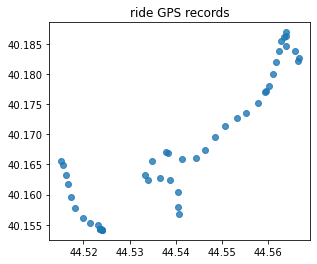

In [21]:
#coppying only the needed columns
gdf_c = gdf_dropped.copy()
gdf_c.drop(['present_index', 'status', 'trip'], axis=1, inplace=True)
gdf_c.head()

#checking by plotting
gdf_c.loc[gdf_c.trips==100].plot(alpha=0.8)
plt.title('ride GPS records')
plt.show()

In [25]:
#defining the fuction for counting origins and destination points of each trip
from tqdm import tqdm
def origins_counter(gdf):    
    origins_df = gdf.loc[gdf['trips']==1, :][:1]
    for trip in tqdm(gdf['trips'].unique()):
        df = gdf[gdf['trips']==trip][:1]
        origins_df = pd.concat([origins_df, df], axis=0, ignore_index=True)
    return origins_df

def dest_counter(gdf):    
    destination_df = gdf.loc[gdf['trips']==1, :][-1:]
    for trip in tqdm(gdf['trips'].unique()):
        df = gdf[gdf['trips']==trip][-1:]
        destination_df = pd.concat([destination_df, df], axis=0, ignore_index=True)
    return destination_df

In [23]:
gdf_c

,createdAt,partnerId,lat,lon,geometry,pindex,trips
0,2019-03-31 15:11:10,2,40.177266,44.445987,POINT (44.44599 40.17727),161,1
1,2019-03-15 16:29:56,12,40.199932,44.496100,POINT (44.49610 40.19993),445,2
2,2019-03-15 16:30:27,12,40.199932,44.496100,POINT (44.49610 40.19993),445,2
3,2019-03-18 20:17:29,12,40.175073,44.572091,POINT (44.57209 40.17507),541,2
4,2019-03-18 20:17:45,12,40.175047,44.572103,POINT (44.57210 40.17505),541,2
...,...,...,...,...,...,...,...
17780556,2019-03-31 21:14:05,279826,40.181720,44.521299,POINT (44.52130 40.18172),473,307576
17780557,2019-03-31 21:14:21,279826,40.180492,44.522924,POINT (44.52292 40.18049),473,307576
17780558,2019-03-31 21:14:37,279826,40.180423,44.522933,POINT (44.52293 40.18042),473,307576
17780559,2019-03-31 21:14:53,279826,40.180408,44.522929,POINT (44.52293 40.18041),473,307576


In [26]:
origins_DF = origins_counter(gdf_c)
origins_DF.head()

100%|███████████████████████████████████████████████████████████████████████| 307576/307576 [36:46:31<00:00,  2.32it/s]


,createdAt,partnerId,lat,lon,geometry,pindex,trips
0,2019-03-31 15:11:10,2,40.177266,44.445987,POINT (44.44599 40.17727),161,1
1,2019-03-31 15:11:10,2,40.177266,44.445987,POINT (44.44599 40.17727),161,1
2,2019-03-15 16:29:56,12,40.199932,44.496100,POINT (44.49610 40.19993),445,2
3,2019-03-18 21:35:18,12,40.190110,44.526218,POINT (44.52622 40.19011),484,3
4,2019-03-18 21:53:02,12,40.209576,44.534560,POINT (44.53456 40.20958),494,4


In [28]:
destinations_DF = dest_counter(gdf_c)
destinations_DF.head()

100%|███████████████████████████████████████████████████████████████████████| 307576/307576 [33:41:40<00:00,  2.54it/s]


,createdAt,partnerId,lat,lon,geometry,pindex,trips
0,2019-03-31 15:11:10,2,40.177266,44.445987,POINT (44.44599 40.17727),161,1
1,2019-03-31 15:11:10,2,40.177266,44.445987,POINT (44.44599 40.17727),161,1
2,2019-03-18 21:35:02,12,40.191227,44.527567,POINT (44.52757 40.19123),483,2
3,2019-03-18 21:52:46,12,40.209918,44.534303,POINT (44.53430 40.20992),493,3
4,2019-03-18 22:01:50,12,40.208968,44.535362,POINT (44.53536 40.20897),494,4


afterall, you can see the reason of my late submission, right? :)

In [30]:
origins_DF.to_csv('origins.csv',index = False)

In [31]:
destinations_DF.to_csv('destinations.csv',index = False)

divide the dataframe into 2hour intervals 


In [39]:
origins_DF = origins_DF[2:]
origins_DF.reset_index(drop=True, inplace=True)


destinations_DF = destinations_DF[2:]
destinations_DF.reset_index(drop=True, inplace=True)


origins_DF = origins_DF.set_index('createdAt')
destinations_DF = destinations_DF.set_index('createdAt')

#error is cuz I accidentaly run this for the second tme - but it works fine, I promise :)

KeyError: "None of ['createdAt'] are in the columns"

In [40]:
origins_DF.index = pd.to_datetime(origins_DF.index)
origins_DF.head(10)

,partnerId,lat,lon,geometry,pindex,trips
1970-01-01 00:00:00.000000000,12,40.209576,44.534560,POINT (44.53456 40.20958),494,4
1970-01-01 00:00:00.000000001,12,40.208958,44.535391,POINT (44.53539 40.20896),494,5
1970-01-01 00:00:00.000000002,12,40.171030,44.567935,POINT (44.56794 40.17103),534,6
1970-01-01 00:00:00.000000003,12,40.176112,44.573990,POINT (44.57399 40.17611),541,7
1970-01-01 00:00:00.000000004,12,40.176112,44.573990,POINT (44.57399 40.17611),541,8
1970-01-01 00:00:00.000000005,12,40.175978,44.573938,POINT (44.57394 40.17598),541,9
1970-01-01 00:00:00.000000006,12,40.135893,44.488627,POINT (44.48863 40.13589),334,10
1970-01-01 00:00:00.000000007,12,40.188773,44.594058,POINT (44.59406 40.18877),227,11
1970-01-01 00:00:00.000000008,12,40.188773,44.594058,POINT (44.59406 40.18877),227,12
1970-01-01 00:00:00.000000009,12,40.188795,44.593803,POINT (44.59380 40.18879),217,13


In [41]:
destinations_DF.index = pd.to_datetime(destinations_DF.index)
destinations_DF.head(10)

,partnerId,lat,lon,geometry,pindex,trips
1970-01-01 00:00:00.000000000,12,40.208968,44.535362,POINT (44.53536 40.20897),494,4
1970-01-01 00:00:00.000000001,12,40.170968,44.567962,POINT (44.56796 40.17097),541,5
1970-01-01 00:00:00.000000002,12,40.176113,44.573991,POINT (44.57399 40.17611),541,6
1970-01-01 00:00:00.000000003,12,40.176112,44.573990,POINT (44.57399 40.17611),541,7
1970-01-01 00:00:00.000000004,12,40.176112,44.573990,POINT (44.57399 40.17611),541,8
1970-01-01 00:00:00.000000005,12,40.135905,44.488342,POINT (44.48834 40.13591),334,9
1970-01-01 00:00:00.000000006,12,40.188773,44.594058,POINT (44.59406 40.18877),227,10
1970-01-01 00:00:00.000000007,12,40.188773,44.594058,POINT (44.59406 40.18877),227,11
1970-01-01 00:00:00.000000008,12,40.188773,44.594058,POINT (44.59406 40.18877),227,12
1970-01-01 00:00:00.000000009,12,40.184506,44.514713,POINT (44.51471 40.18451),463,13


In [33]:
# start building the origin-destination matrix in dataframe format - 
num_poly = len(yerevan_gdf)
origs = []
dests = []
for i in range(num_poly):
    for j in range(num_poly):
        origs.append(i)
        dests.append(j)
print(len(origs), len(dests))

data = pd.DataFrame({'origins': origs, 'destinations': dests})
data.head()

301401 301401


,origins,destinations
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [37]:
print(num_poly)

549


In [42]:
from tqdm import tqdm
mat1 = []

for hour in tqdm(range(1, 25, 2)):
    mat = np.zeros(shape = (num_poly, num_poly), dtype = np.uint16)
    hour_orig_df = origins_DF.between_time(start_time = '{}:00:00'.format((hour - 2) % 24), end_time = '{}:00:00'.format(hour % 24))
    hour_dest_df = destinations_DF[destinations_DF.trips.isin(hour_orig_df.trips.unique())]
    for trip in tqdm(hour_orig_df.trips.unique()):
        if (hour_dest_df[hour_dest_df.trips == trip].index - hour_orig_df[hour_orig_df.trips == trip].index).total_seconds().item() < 21000:
            mat[hour_orig_df[hour_orig_df.trips == trip].pindex.iloc[0], hour_dest_df[hour_dest_df.trips == trip].pindex.iloc[0]] += 1
        else:
            pass
    np.seterr(divide = 'ignore')
    mat1.append(mat.astype(int))
    
    
data.head()

  0%|                                                                          | 131/307573 [00:17<13:44:37,  6.21it/s]


  0%|                                                                           | 270/307573 [00:35<9:42:21,  8.79it/s]


  0%|                                                                          | 411/307573 [00:54<10:41:04,  7.99it/s]


  0%|▏                                                                         | 579/307573 [01:14<11:01:28,  7.74it/s]


  0%|▏                                                                          | 727/307573 [01:34<8:32:39,  9.98it/s]


  0%|▏                                                                         | 875/307573 [01:52<10:38:05,  8.01it/s]


  0%|▏                                                                        | 1017/307573 [02:12<14:49:07,  5.75it/s]


  0%|▎                                                                        | 1153/307573 [02:33<17:43:24,  4.80it/s]


  0%|▎                                                                         | 1299/307573 [02:53<8:44:59,  9.72it/s]


  0%|▎                                                                        | 1441/307573 [03:13<10:33:31,  8.05it/s]


  1%|▎                                                                        | 1578/307573 [03:33<11:30:11,  7.39it/s]


  1%|▍                                                                         | 1719/307573 [03:54<9:33:21,  8.89it/s]


  1%|▍                                                                        | 1862/307573 [04:16<10:27:06,  8.12it/s]


  1%|▍                                                                        | 2007/307573 [04:38<21:00:39,  4.04it/s]


  1%|▌                                                                        | 2145/307573 [05:01<10:13:20,  8.30it/s]


  1%|▌                                                                        | 2285/307573 [05:22<12:15:21,  6.92it/s]


  1%|▌                                                                        | 2424/307573 [05:43<12:02:42,  7.04it/s]


  1%|▌                                                                        | 2559/307573 [06:05<10:46:09,  7.87it/s]


  1%|▋                                                                        | 2694/307573 [06:26<10:39:58,  7.94it/s]


  1%|▋                                                                        | 2836/307573 [06:44<15:19:53,  5.52it/s]


  1%|▋                                                                         | 2976/307573 [07:04<9:11:17,  9.21it/s]


  1%|▊                                                                         | 3120/307573 [07:23<8:45:56,  9.65it/s]


  1%|▊                                                                        | 3262/307573 [07:42<10:38:30,  7.94it/s]


  1%|▊                                                                        | 3396/307573 [08:00<13:31:16,  6.25it/s]


  1%|▊                                                                        | 3537/307573 [08:19<11:05:47,  7.61it/s]


  1%|▊                                                                        | 3678/307573 [08:39<10:54:03,  7.74it/s]


  1%|▉                                                                        | 3823/307573 [08:59<15:50:37,  5.33it/s]


  1%|▉                                                                        | 3961/307573 [09:18<13:53:14,  6.07it/s]


  1%|▉                                                                        | 4098/307573 [09:40<13:46:56,  6.12it/s]


  1%|█                                                                        | 4238/307573 [10:00<11:27:07,  7.36it/s]


  1%|█                                                                        | 4387/307573 [10:19<10:25:57,  8.07it/s]


  1%|█                                                                        | 4524/307573 [10:39<10:42:32,  7.86it/s]


  2%|█                                                                         | 4669/307573 [10:58<9:27:48,  8.89it/s]


  2%|█▏                                                                        | 4814/307573 [11:18<9:03:50,  9.28it/s]


  2%|█▏                                                                       | 4949/307573 [11:37<13:00:16,  6.46it/s]


  2%|█▏                                                                       | 5109/307573 [11:57<10:29:46,  8.00it/s]


  2%|█▎                                                                        | 5257/307573 [12:15<9:09:26,  9.17it/s]


  2%|█▎                                                                       | 5412/307573 [12:34<10:21:37,  8.10it/s]


  2%|█▎                                                                        | 5549/307573 [12:50<9:26:10,  8.89it/s]


  2%|█▎                                                                        | 5687/307573 [13:07<9:26:54,  8.88it/s]


  2%|█▍                                                                       | 5824/307573 [13:23<10:38:51,  7.87it/s]


  2%|█▍                                                                       | 5956/307573 [13:44<12:16:41,  6.82it/s]


  2%|█▍                                                                       | 6088/307573 [14:04<12:29:48,  6.70it/s]


  2%|█▍                                                                       | 6220/307573 [14:24<12:19:23,  6.79it/s]


  2%|█▌                                                                       | 6352/307573 [14:44<12:52:07,  6.50it/s]


  2%|█▌                                                                       | 6484/307573 [15:03<13:09:46,  6.35it/s]


  2%|█▌                                                                       | 6616/307573 [15:23<13:24:59,  6.23it/s]


  2%|█▌                                                                       | 6748/307573 [15:43<12:47:27,  6.53it/s]


  2%|█▋                                                                       | 6880/307573 [16:02<12:27:40,  6.70it/s]


  2%|█▋                                                                       | 7012/307573 [16:22<11:10:44,  7.47it/s]


  2%|█▋                                                                       | 7144/307573 [16:43<12:44:47,  6.55it/s]


  2%|█▋                                                                       | 7276/307573 [17:08<12:14:16,  6.82it/s]


  2%|█▊                                                                       | 7408/307573 [17:30<14:16:31,  5.84it/s]


  2%|█▊                                                                       | 7540/307573 [17:50<11:26:34,  7.28it/s]


  2%|█▊                                                                       | 7672/307573 [18:12<13:36:34,  6.12it/s]


  3%|█▊                                                                       | 7804/307573 [18:32<13:58:27,  5.96it/s]


  3%|█▉                                                                       | 7936/307573 [18:53<12:18:30,  6.76it/s]


  3%|█▉                                                                       | 8068/307573 [19:13<14:19:40,  5.81it/s]


  3%|█▉                                                                       | 8200/307573 [19:33<14:36:42,  5.69it/s]


  3%|█▉                                                                       | 8332/307573 [19:54<12:05:09,  6.88it/s]


  3%|██                                                                       | 8464/307573 [20:13<11:43:55,  7.08it/s]


  3%|██                                                                       | 8596/307573 [20:31<10:23:05,  8.00it/s]


  3%|██                                                                        | 8749/307573 [20:51<8:14:33, 10.07it/s]


  3%|██▏                                                                       | 8951/307573 [21:14<7:54:03, 10.50it/s]


  3%|██▏                                                                      | 9203/307573 [21:39<10:25:25,  7.95it/s]


  3%|██▏                                                                      | 9335/307573 [21:56<10:45:47,  7.70it/s]


  3%|██▏                                                                      | 9467/307573 [22:13<10:28:03,  7.91it/s]


  3%|██▎                                                                      | 9599/307573 [22:30<11:18:36,  7.32it/s]


  3%|██▎                                                                       | 9797/307573 [22:51<8:07:28, 10.18it/s]


  3%|██▍                                                                      | 10033/307573 [23:14<7:52:08, 10.50it/s]


  3%|██▍                                                                      | 10284/307573 [23:38<7:56:36, 10.40it/s]


  3%|██▍                                                                     | 10517/307573 [24:02<10:56:30,  7.54it/s]


  3%|██▍                                                                     | 10649/307573 [24:19<10:24:54,  7.92it/s]


  4%|██▌                                                                     | 10781/307573 [24:36<12:11:02,  6.77it/s]


  4%|██▌                                                                     | 10913/307573 [24:53<10:40:29,  7.72it/s]


  4%|██▋                                                                      | 11070/307573 [25:11<7:38:22, 10.78it/s]


  4%|██▋                                                                      | 11334/307573 [25:36<7:36:55, 10.81it/s]


  4%|██▋                                                                     | 11560/307573 [25:59<10:40:31,  7.70it/s]


  4%|██▋                                                                     | 11692/307573 [26:17<10:54:18,  7.54it/s]


  4%|██▊                                                                     | 11824/307573 [26:35<10:05:33,  8.14it/s]


  4%|██▊                                                                     | 11956/307573 [26:52<10:19:04,  7.96it/s]


  4%|██▊                                                                     | 12088/307573 [27:09<10:36:01,  7.74it/s]


  4%|██▊                                                                     | 12222/307573 [27:28<11:04:28,  7.41it/s]


  4%|██▉                                                                      | 12367/307573 [27:47<9:54:12,  8.28it/s]


  4%|██▉                                                                     | 12511/307573 [28:05<11:40:34,  7.02it/s]


  4%|██▉                                                                     | 12649/307573 [28:23<12:45:06,  6.42it/s]


  4%|██▉                                                                     | 12781/307573 [28:46<12:50:20,  6.38it/s]


  4%|███                                                                     | 12937/307573 [29:07<13:37:53,  6.00it/s]


  4%|███                                                                     | 13070/307573 [29:26<11:22:14,  7.19it/s]


  4%|███                                                                     | 13202/307573 [29:44<13:19:27,  6.14it/s]


  4%|███                                                                     | 13334/307573 [30:06<13:05:35,  6.24it/s]


  4%|███▏                                                                    | 13466/307573 [30:27<11:55:08,  6.85it/s]


  4%|███▏                                                                    | 13598/307573 [30:49<14:14:11,  5.74it/s]


  4%|███▏                                                                    | 13730/307573 [31:09<11:22:38,  7.17it/s]


  5%|███▏                                                                    | 13862/307573 [31:28<14:28:10,  5.64it/s]


  5%|███▎                                                                    | 13994/307573 [31:50<13:53:08,  5.87it/s]


  5%|███▎                                                                    | 14126/307573 [32:10<12:56:00,  6.30it/s]


  5%|███▎                                                                    | 14258/307573 [32:29<12:45:26,  6.39it/s]


  5%|███▎                                                                    | 14390/307573 [32:49<11:55:31,  6.83it/s]


  5%|███▍                                                                    | 14522/307573 [33:09<12:36:56,  6.45it/s]


  5%|███▍                                                                    | 14654/307573 [33:28<11:17:26,  7.21it/s]


  5%|███▍                                                                    | 14786/307573 [33:48<11:50:40,  6.87it/s]


  5%|███▍                                                                    | 14918/307573 [34:08<10:55:19,  7.44it/s]


  5%|███▌                                                                    | 15050/307573 [34:30<13:13:59,  6.14it/s]


  5%|███▌                                                                    | 15182/307573 [34:51<12:25:27,  6.54it/s]


  5%|███▌                                                                    | 15314/307573 [35:12<11:25:17,  7.11it/s]


  5%|███▌                                                                    | 15446/307573 [35:32<13:06:37,  6.19it/s]


  5%|███▋                                                                    | 15578/307573 [35:52<13:28:43,  6.02it/s]


  5%|███▋                                                                    | 15710/307573 [36:13<14:57:47,  5.42it/s]


  5%|███▋                                                                    | 15842/307573 [36:33<11:22:30,  7.12it/s]


  5%|███▋                                                                    | 15974/307573 [36:53<11:21:27,  7.13it/s]


  5%|███▊                                                                    | 16106/307573 [37:14<11:21:06,  7.13it/s]


  5%|███▊                                                                    | 16238/307573 [37:34<11:35:40,  6.98it/s]


  5%|███▊                                                                    | 16370/307573 [37:53<11:10:52,  7.23it/s]


  0%|                                                                                           | 0/12 [38:13<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
mat3d = np.zeros(84)
mat3d = []
k = 0
for i in range(7):
    for j in range(len(mat1)):
        mat3d.append(mat_[j])
        
OD_matrices = mat3d.copy()

In [ ]:
from collections import namedtuple

Param = namedtuple('Param', 'R0 DE DI I0 HospitalisationRate HospitalIters')

In [ ]:
Param = 0


%run virus-sim.py

r = OD_matrices.shape[0]
n = pop.shape[1]
N = 1000000.0

initialInd = [100, 150, 390, 500, 220, 200]
initial = np.zeros(n)
initial[initialInd] = 50

model = Param(R0=2.4, DE= 5.6 * 12, DI= 5.2 * 12, \
              I0=initial, HospitalisationRate=0.1, HospitalIters=15*12)

In [ ]:
def seir(par, distr, flow, alpha, iterations, inf):
       
    r = flow.shape[0]  # number of two-hour intervals
    n = flow.shape[1]  # number of grid cells
    N = distr[0].sum() # total population, we assume that N = sum(flow)
    
    Svec = distr[0].copy()
    Evec = np.zeros(n)
    Ivec = np.zeros(n)
    Rvec = np.zeros(n)
    
    if par.I0 is None:
        initial = np.zeros(n)
        # randomly choose inf infections
        for i in range(inf):
            loc = np.random.randint(n)
            if (Svec[loc] > initial[loc]):
                initial[loc] += 1.0
                
    else:
        initial = par.I0
    assert ((Svec < initial).sum() == 0)
    
    Svec =- initial
    Ivec =+ initial
    
    res = np.zeros((iterations, 5))
    res[0,:] = [Svec.sum(), Evec.sum(), Ivec.sum(), Rvec.sum(), 0]
    
    realflow = flow.copy() 
    
    for k in range(len(realflow)):
        for i in range(549):
            realflow[k][i] = np.nan_to_num(realflow[k][i], copy=False, nan=0.0)
    

    print(realflow)

    realflow = realflow / realflow.sum(axis=2)[:,:, np.newaxis]    
    realflow = alpha * realflow    
    
    for k in range(len(realflow)):
        for i in range(549):

            realflow[k][i] = np.nan_to_num(realflow[k][i], copy=True, nan=0.0)
    
    print(realflow)
    history = np.zeros((iterations, 5, n))
    history[0,0,:] = Svec
    history[0,1,:] = Evec
    history[0,2,:] = Ivec
    history[0,3,:] = Rvec
    
    eachIter = np.zeros(iterations + 1)
    
    # run simulation
    for iter in range(0, iterations - 1):
        realOD = realflow[iter % r]
        
        d = distr[iter % r] + 1
        
        if ((d>N+1).any()): #assertion!
            print("Houston, we have a problem!")
            return res, history
        # N =  S + E + I + R
        
        newE = Svec * Ivec / d * par.R0 / par.DI
        newI = Evec / par.DE
        newR = Ivec / par.DI
        
        Svec -= newE
        Svec = (Svec 
               + np.matmul(Svec.reshape(1,n), realOD)
               - Svec * realOD.sum(axis=1)
                )
        Svec = np.nan_to_num(Svec, copy=False, nan=0.0)
        print(Svec)              
        Evec = Evec + newE - newI
        Evec = (Evec 
               + np.matmul(Evec.reshape(1,n), realOD)
               - Evec * realOD.sum(axis=1)
                )
        print(Evec)        
        Ivec = Ivec + newI - newR
        Ivec = (Ivec 
               + np.matmul(Ivec.reshape(1,n), realOD)
               - Ivec * realOD.sum(axis=1)
                )
        print(Ivec)        
        Rvec += newR
        Rvec = (Rvec 
               + np.matmul(Rvec.reshape(1,n), realOD)
               - Rvec * realOD.sum(axis=1)
                )
        print(Rvec)       
        res[iter + 1,:] = [Svec.sum(), Evec.sum(), Ivec.sum(), Rvec.sum(), 0]
        eachIter[iter + 1] = newI.sum()
        res[iter + 1, 4] = eachIter[max(0, iter - par.HospitalIters) : iter].sum() * par.HospitalisationRate
        
        history[iter + 1,0,:] = Svec
        history[iter + 1,1,:] = Evec
        history[iter + 1,2,:] = Ivec
        history[iter + 1,3,:] = Rvec

    print(res)
    print(history)
    return res, history

In [ ]:
res['baseline'] = seir(model, pop, OD_matrices_, alpha, iterations, inf)
seir(model, pop, OD_matrices_, alpha, iterations, inf)

In [ ]:
print(
"Max number of hospitalised people: ", int(res["baseline"][0][:, 4].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:, 4].argmax() / 12)
)

seir_plot(res["baseline"][0])

In [ ]:
def seir_plot(res):
    plt.plot(res[::12, 0], color='r', label='S')
    plt.plot(res[::12, 1], color='g', label='E')
    plt.plot(res[::12, 2], color='b', label='I')
    plt.plot(res[::12, 3], color='y', label='R')
    plt.plot(res[::12, 4], color='c', label='H')
    plt.legend()

In [ ]:
max_exp_ind = np.where(baseline[:, 1, :] == baseline[:, 1, :].max())[0].item()
max_exp_val = baseline[:, 1, :].max()
print(max_exp_ind, max_exp_val)

In [ ]:
ncolors = 256

color_array = plt.get_cmap('BuPu')(range(ncolors))
print(color_array.shape)
print(color_array)

color_array[:, -1] = np.linspace(0.3, 1, ncolors)

import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name="BuPu_transp", colors=color_array)

plt.register_cmap(cmap=map_object)

# plot some example data
fig, ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap='BuPu_transp')
plt.colorbar(mappable=h)

def trunc_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n}, {a:.2f}, {b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
                                                cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('BuPu_transp')
new_cmap = trunc_colormap(cmap, 0.0, .9)

# plot some example data
fig, ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap=new_cmap)
plt.colorbar(mappable=h)

In [ ]:
print("baseline dimensions: ", baseline.shape)
print("hosp dimensions: ", hosp.shape)

In [ ]:
params = {"axes.labelcolor":"slategrey"}
plt.rcParams.update(params)
cmap = plt.cm.get_cmap("Blues")
blue = cmap(200)

from tqdm import tqdm

for time_step in tqdm(range(1,251)):
    
    yerevan_gdf_3857['exposed'] = baseline[time_step-1, 1, :]
    
    #plot
    fig, ax = plt.subplots(figsize=(14,14), dpi=72)
    yerevan_gdf_3857.loc[yerevan_gdf_3857.index==84, 'exposed'] = max_exp_val + 1
    yerevan_gdf_3857.plot(ax=ax, facecolor='none', edgecolor='gray', alpha=0.5, linewidth=0.5, zorder=2)
    yerevan_gdf_3857.plot(ax=ax, column='exposed', cmap=new_cmap, zorder=3)
    # add background
    ctx.add_basemap(ax, attribution="", source=ctx.providers.Stamen.TonerLite, zoom='auto', alpha=0.6)
    
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.tight_layout()
    
    inset_ax = fig.add_axes([0.6, 0.14, 0.37, 0.27])
    inset_ax.patch.set_alpha(0.5)
    
    inset_ax.plot(baseline[:time_step, 0].sum(axis=1), label="susceptible", color=blue, ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 1].sum(axis=1), label="exposed", color='g', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 2].sum(axis=1), label="infectious", color='r', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 3].sum(axis=1), label="recovered", color='y', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(hosp[:time_step], label="hospitalised", color='purple', ls='-', lw=1.5, alpha=0.8)
    
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 0].sum(), color=blue, s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 1].sum(), color='g', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 2].sum(), color='r', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 3].sum(), color='y', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple', s=50, alpha=0.2)
    
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 0].sum(), color=blue, s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 1].sum(), color='g', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 2].sum(), color='r', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 3].sum(), color='y', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple', s=20, alpha=0.8)
    
    inset_ax.fill_between(np.arange(0, time_step), np.maximum(baseline[:time_step, 0].sum(axis=1), \
                                                             baseline[:time_step, 3].sum(axis=1)), alpha=0.035, color='r')
    inset_ax.plot([time_step, time_step], [0, max(baseline[(time_step-1), 0].sum(), \
                                              baseline[(time_step-1), 3].sum())], ls='--', lw=0.7, alpha=0.8, color='r')
    
    inset_ax.set_ylabel('Population', size=18, alpha=1, rotation=90)
    inset_ax.set_xlabel('Days', size=18, alpha=1)
    inset_ax.yaxis.set_label_coords(-0.15, 0.55)
    inset_ax.tick_params(direction='in', size=10)
    inset_ax.set_xlim(-4, 254)
    inset_ax.set_ylim(-24000, 1024000)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    inset_ax.grid(alpha=0.4)
    
    inset_ax.spines['right'].set_visible(False)
    inset_ax.spines['top'].set_visible(False)
    
    inset_ax.spines['left'].set_color('darkslategrey')
    inset_ax.spines['bottom'].set_color('darkslategrey')
    inset_ax.tick_params(axis='x', colors='darkslategrey')
    inset_ax.tick_params(axis='y', colors='darkslategrey')
    plt.legend(prop={'size':14, 'weight':'light'}, framealpha=0.5)
    
    plt.title("Yerevan Covid-19 spreading on day: {}".format(time_step), fontsize=18, color= 'dimgray')
    
    if time_step % 2 == 0:
        plt.savefig("Final/flows_{}.jpg".format(time_step), dpi=fig.dpi)
    if time_step % 25 == 0:
        plt.show()
    plt.close()

In [ ]:
import re

def sort_in_order( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanumeric_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanumeric_key)

from os import listdir

filenames = listdir("Final/")
filenames = sort_in_order(filenames)
print(filenames)

In [ ]:
import imageio
with imageio.get_writer('Covid_19.gif', mode='I', fps=16) as writer:
    for filename in tqdm(filenames):
        image = imageio.imread('Final/{}'.format(filename))
        writer.append_data(image)